<a href="https://colab.research.google.com/github/NafisulMukitPallab/Final-Project/blob/main/Nafisul_Final_Project_On_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tqdm
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

### **Data Import** 

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_1.csv to Credit_1.csv
User uploaded file "Credit_1.csv" with length 107087938 bytes


### **Data Analysis** 




In [39]:
df_train_Data = pd.read_csv('/content/Credit_1.csv')
df_test_Data = pd.read_csv('/content/Credit_1.csv')
target     = 'Class'

In [40]:
df_train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199364 entries, 0 to 199363
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  199364 non-null  int64  
 1   Time        199364 non-null  float64
 2   V1          199364 non-null  float64
 3   V2          199364 non-null  float64
 4   V3          199364 non-null  float64
 5   V4          199364 non-null  float64
 6   V5          199364 non-null  float64
 7   V6          199364 non-null  float64
 8   V7          199364 non-null  float64
 9   V8          199364 non-null  float64
 10  V9          199364 non-null  float64
 11  V10         199364 non-null  float64
 12  V11         199364 non-null  float64
 13  V12         199364 non-null  float64
 14  V13         199364 non-null  float64
 15  V14         199364 non-null  float64
 16  V15         199364 non-null  float64
 17  V16         199364 non-null  float64
 18  V17         199364 non-null  float64
 19  V1

In [41]:
df_train_Data['Class'].value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [9]:
df_train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,199364.0,142370.694298,82252.491647,1.000000,71041.250000,142294.500000,213638.250000,284806.000000
Time,199364.0,94799.493936,47499.835491,0.000000,54126.000000,84633.500000,139334.250000,172792.000000
V1,199364.0,0.000315,1.963554,-46.855047,-0.921539,0.019705,1.316707,2.451888
V2,199364.0,-0.002690,1.657379,-63.344698,-0.601213,0.063784,0.802437,22.057729
V3,199364.0,-0.001532,1.516716,-33.680984,-0.892838,0.177888,1.025529,9.382558
V4,199364.0,0.000721,1.417138,-5.560118,-0.848835,-0.017852,0.745566,16.715537
V5,199364.0,-0.001494,1.368744,-42.147898,-0.692874,-0.055832,0.609349,34.099309
V6,199364.0,-0.000210,1.328673,-23.496714,-0.769177,-0.274397,0.397928,23.917837
V7,199364.0,-0.000870,1.226018,-43.557242,-0.554220,0.039228,0.569638,44.054461
V8,199364.0,-0.001980,1.212338,-73.216718,-0.209086,0.021803,0.327023,20.007208


In [10]:
df_train_Data.isna().sum().sort_values(ascending=False)

Unnamed: 0    0
Time          0
Amount        0
V28           0
V27           0
V26           0
V25           0
V24           0
V23           0
V22           0
V21           0
V20           0
V19           0
V18           0
V17           0
V16           0
V15           0
V14           0
V13           0
V12           0
V11           0
V10           0
V9            0
V8            0
V7            0
V6            0
V5            0
V4            0
V3            0
V2            0
V1            0
Class         0
dtype: int64

In [11]:
df_train_Data.duplicated().sum()

0

In [12]:
df_train_Data.drop_duplicates(inplace=True)

### **Visiualization**

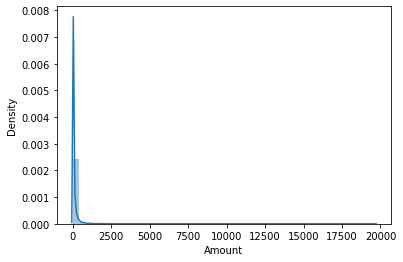

In [13]:
sns.distplot(df_train_Data['Amount'])
plt.show()

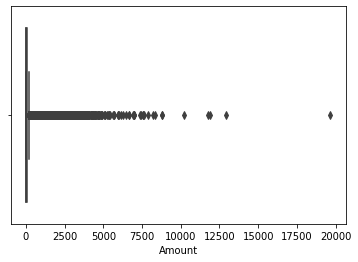

In [14]:
sns.boxplot(df_train_Data['Amount'])
plt.show()

### **Data Split**

In [42]:
x = df_train_Data.drop('Class',axis=1).copy()
y = df_train_Data['Class'].copy()

x , y = make_imbalance(x,y, sampling_strategy={0: 333, 1: 333},random_state=14)

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

from sklearn.feature_selection import RFE
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x_train, y_train)


from operator import itemgetter
features = x_train.columns.to_list()
    

rfe = RFE(regressor, step= 1, n_features_to_select=15)
rfe.fit(x_train, y_train)

rfe.transform(x_train)

predictions = rfe.predict(x_test)


In [44]:
c = np.where(rfe.support_ == False)

new_data = df_train_Data.drop(df_train_Data.columns[c], axis=1)

new_data = pd.DataFrame(new_data, columns= new_data.keys())

In [45]:
new_data.head(10)

,V3,V4,V8,V10,V11,V12,V13,V14,V15,V17,V19,V20,V21,V22,V23,Class
0,-0.650588,-0.996032,0.633016,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,0.262987,-0.939037,-0.062612,-0.062489,0.005292,0.251519,0
1,-1.514760,0.115021,-0.264353,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,-0.658905,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0
2,1.573127,0.687266,-1.098608,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-1.267675,0.405276,0.052960,0.015324,1.063663,-0.410841,0
3,0.555143,-0.629355,-0.032659,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.710309,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0
4,0.615391,-0.561114,-0.097430,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.512582,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0
5,1.105997,-0.197960,-0.398320,1.322536,-0.269015,-1.289154,-1.930435,-0.772690,1.250825,-0.131895,-0.173225,0.557285,-0.517503,-0.874559,0.062009,0
6,0.448919,1.442484,0.205401,-0.149548,1.086603,0.665781,-0.874429,0.368767,0.154538,-0.232156,-0.543789,0.603998,0.431729,0.466787,-0.461026,0
7,-1.650107,-0.365683,-0.007762,0.909532,-2.403510,-1.636109,-2.466221,0.407082,-0.370246,0.155404,-0.409513,-0.761811,-0.310062,-0.284436,0.066401,0
8,-2.838006,-0.425763,-0.684210,0.925868,-1.176245,0.027884,0.836131,0.558308,-0.377175,0.023052,-0.605273,-0.167993,-0.006271,0.194557,-0.269786,0
9,1.028302,0.090509,0.494693,-0.384694,1.265184,1.152918,-0.681899,-0.179710,-0.429674,0.489638,0.015142,-0.040196,-0.095094,-0.145423,0.080706,0


### **Univarient**

In [46]:
x1 = new_data.drop('Class',axis=1).copy()
y1 = new_data['Class'].copy()

x1 , y1 = make_imbalance(x1,y1, sampling_strategy={0: 333, 1: 333},random_state=14)

x1_train ,x1_test ,y1_train ,y1_test = train_test_split(x1,y1,test_size=.3,random_state=42)

In [47]:
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=14)
select = bestfeatures.fit(x1_train,y1_train)
X_train_selected = select.transform(x1_train)

print("X_train.shape: {}".format(x1_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (466, 15)
X_train_selected.shape: (466, 14)


In [48]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [49]:
from sklearn.tree import DecisionTreeClassifier
X_test_selected = select.transform(x1_test)

model = DecisionTreeClassifier(criterion= "entropy",random_state=42)
model.fit (x1_train,y1_train)
print("Score with all features: {:.3f}".format(model.score(x1_test,y1_test)))

model.fit (X_train_selected,y_train)
print("Score with selected features: {:.3f}".format(model.score(X_test_selected,y1_test)))

Score with all features: 0.885
Score with selected features: 0.910


### **Saving The final dataset**

In [50]:
feature_names = list(new_data.columns.values)

mask = bestfeatures.get_support()
features_for_final_data = []
for b, f in zip(mask, feature_names):
  if b:
    features_for_final_data.append(f)

features_for_final_data.append('class')

In [27]:
final_data = pd.DataFrame(new_data, columns= features_for_final_data)

In [51]:
final_data.head()

,V3,V4,V8,V10,V11,V12,V13,V14,V15,V17,V19,V20,V21,V25,class
0,-0.650588,-0.996032,0.633016,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,0.262987,-0.939037,-0.062612,-0.062489,-0.889690,NaN
1,-1.514760,0.115021,-0.264353,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,-0.658905,0.431762,-0.086076,-0.329368,-0.135785,NaN
2,1.573127,0.687266,-1.098608,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-1.267675,0.405276,0.052960,0.015324,-0.171733,NaN
3,0.555143,-0.629355,-0.032659,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.710309,0.130406,-0.066712,-0.014814,0.151810,NaN
4,0.615391,-0.561114,-0.097430,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.512582,-0.163736,-0.073333,-0.221533,0.679496,NaN


In [52]:
final_data.shape

(199364, 15)

### **Selecting Model For testing accuracy**

In [53]:
x2 = final_data.drop('class', axis= 1)
y2 = final_data['class'].copy()

x2 , y2 = make_imbalance(x,y, sampling_strategy={0: 333, 1: 333},random_state=14)

x2Train, x2Test, y2Train, y2Test = train_test_split(x2, y2, test_size= 0.3, random_state= 0)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators= 30, criterion= "entropy")
rf1.fit(x2Train, y2Train)

yPredRF = rf1.predict(x2Test)

Random Forest (with 10 decision tree) Report
Confusion Matrix: 
 [[99  1]
 [ 9 91]]
Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       100
           1       0.99      0.91      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

AUC Score:  0.9907499999999999


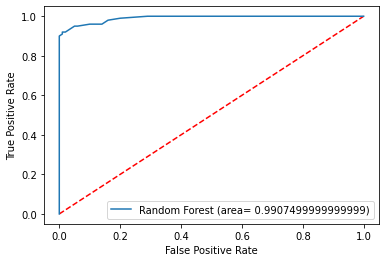

In [55]:
import matplotlib.pyplot as mtp
from sklearn import metrics

print("Random Forest (with 10 decision tree) Report")
print("Confusion Matrix: \n", metrics.confusion_matrix(y2Test, yPredRF))
print("Accuracy: ", metrics.accuracy_score(y2Test, yPredRF))
print(metrics.classification_report(y2Test, yPredRF))

yPredRFproba = rf1.predict_proba(x2Test)[:,1]
AUCLR = metrics.roc_auc_score(y2Test, yPredRFproba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues= metrics.roc_curve(y2Test, yPredRFproba)
mtp.plot([0,1], [0,1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Random Forest (area= " +str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()

Logistic Regression Report
Confusion Matrix: 
 [[99  1]
 [12 88]]
Accuracy:  0.935
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       100
           1       0.99      0.88      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200

AUC Score:  0.9788


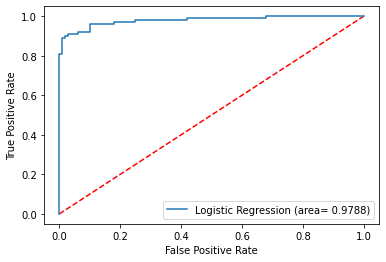

In [56]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state=0)
lgr.fit(x2Train, y2Train)

yPrdclgr = lgr.predict(x2Test)

print("Logistic Regression Report")
print("Confusion Matrix: \n", metrics.confusion_matrix(y2Test, yPrdclgr))
print("Accuracy: ", metrics.accuracy_score(y2Test, yPrdclgr))
print(metrics.classification_report(y2Test, yPrdclgr))

yPredlgrproba = lgr.predict_proba(x2Test)[:,1]
AUCLR = metrics.roc_auc_score(y2Test, yPredlgrproba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues= metrics.roc_curve(y2Test, yPredlgrproba)
mtp.plot([0,1], [0,1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Logistic Regression (area= " +str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()

Decision Tree Report
Confusion Matrix: 
 [[92  8]
 [ 5 95]]
Accuracy:  0.935
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.92      0.95      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200

AUC Score:  0.935


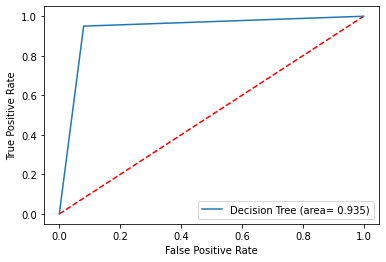

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= "entropy", random_state= 0)
dt.fit(x2Train, y2Train)

yPredDT = dt.predict(x2Test)

print("Decision Tree Report")
print("Confusion Matrix: \n", metrics.confusion_matrix(y2Test, yPredDT))
print("Accuracy: ", metrics.accuracy_score(y2Test, yPredDT))
print(metrics.classification_report(y2Test, yPredDT))

yPredDTproba = dt.predict_proba(x2Test)[:,1]
AUCLR = metrics.roc_auc_score(y2Test, yPredDTproba)
print("AUC Score: ", AUCLR)
fprLR, tprLR, thresholdvalues= metrics.roc_curve(y2Test, yPredDTproba)
mtp.plot([0,1], [0,1], color='red', linestyle='--')
mtp.plot(fprLR, tprLR, label="Decision Tree (area= " +str(AUCLR)+")")
mtp.xlabel("False Positive Rate")
mtp.ylabel("True Positive Rate")
mtp.legend(loc="lower right")
mtp.show()